# Imports

In [351]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pymongo import MongoClient
import os
import math
import json
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
import scipy.sparse
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import svds
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity,pairwise_distances
from scipy.stats import pearsonr
from scipy.spatial.distance import cosine
from scipy import sparse
import time
from typing import Tuple
import logging

path_data="../data/raw/Books/"

In [352]:
logger=logging.getLogger("main")
logger.setLevel("INFO")

In [50]:
# Read file




df_ratings=pd.read_csv("%s/%s"%(path_data,"ratings.csv"))


In [339]:
df_books=pd.read_csv("%s/%s"%(path_data,"books.csv"))
df_books=df_books.set_index("id")

In [51]:
# Remove duplicates

df_ratings=df_ratings.drop_duplicates(subset=["book_id","user_id"])

In [4]:
df_ratings.shape

(979478, 3)

In [59]:
df_pivot=df_ratings.pivot(index='user_id', columns='book_id', values='rating')

In [6]:
df_pivot

book_id,1,2,3,4,5,6,7,8,9,10,...,9991,9992,9993,9994,9995,9996,9997,9998,9999,10000
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53420,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53421,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53422,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df_pivot.count(axis=1)

user_id
1         3
2         3
3         2
4         3
5         5
         ..
53420     6
53421     8
53422    18
53423     2
53424    16
Length: 53424, dtype: int64

In [60]:
min_ratings_by_user=3


df_pivot=df_pivot[df_pivot.count(axis=1)>=min_ratings_by_user]

In [55]:
df_pivot

book_id,1,2,3,4,5,6,7,8,9,10,...,9991,9992,9993,9994,9995,9996,9997,9998,9999,10000
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53419,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53420,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53421,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
df_pivot=df_pivot.iloc[0:int(df_pivot.shape[0]*0.4),:]

In [10]:
# df_pivot=df_pivot.sample(random_state=0,frac=0.2)

In [71]:
df_pivot.to_pickle("books.pickle")

<AxesSubplot:>

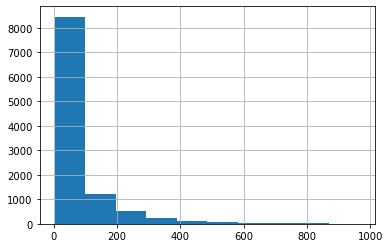

In [97]:
df_pivot.sum(axis=1).hist()

<AxesSubplot:>

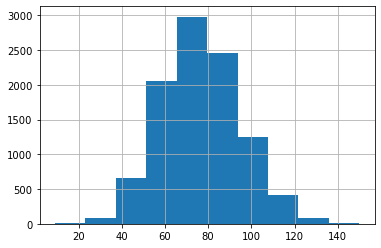

In [96]:
df_pivot.sum().hist()

In [451]:
X1=np.array([2,3])
X2=np.array([1,2])

print(1-cosine(X1,X2)) 
print(pearsonr(X1,X2)) 
# print(nan_similarity(X1,X2,metric='co'))
# print(nan_similarity(X1,X2,metric='pearsonr'))


0.9922778767136677
(1.0, 1.0)


In [445]:
A1=X1-np.mean(X1)
A2=X2-np.mean(X2)
print(A1,A2)

print(1-cosine(A1,A2) )
print(pearsonr(A1,A2))


[-1.5  1.5] [ 1.5 -1.5]
-1.0
(-1.0, 1.0)


# Functions

In [542]:
def common_no_nan(X1:np.ndarray,X2:np.ndarray):
    common_bool=np.logical_and(~np.isnan(X1), ~np.isnan(X2))
    num_X1=(~np.isnan(X1)).sum()
    num_X2=(~np.isnan(X2)).sum()
    num_common=common_bool.sum()
    X1_reduce=X1[common_bool]
    X2_reduce=X2[common_bool]
    
    return (X1_reduce,X2_reduce,num_common,num_X1,num_X2)

def norm_ratio(X1,X2):
    X1=X1[~np.isnan(X1)]
    X2=X2[~np.isnan(X2)]
    norm=np.sort([np.linalg.norm(X1),np.linalg.norm(X2)])
    norm_ratio=norm[0]/norm[1]
    
    return norm_ratio
    
def nan_similarity(X1:np.ndarray,X2:np.ndarray,metric='cosine')-> tuple[float,float,int,int,int]:
    if metric not in ["cosine","pearsonr"]:
        raise ValueError("metric should be in [cosine,pearsonr]")
    (X1_reduce,X2_reduce,num_common,num_X1,num_X2)=common_no_nan(X1,X2)
    if num_common<=1:
        return np.nan,np.nan,num_common,num_X1,num_X2
    if metric=="pearsonr":
        value_out,_=pearsonr(X1_reduce,X2_reduce)
    else:
        value_out=1-cosine(X1_reduce,X2_reduce) 
        
    norm_ratio_value=norm_ratio(X1_reduce,X2_reduce)
    
    return value_out,norm_ratio_value,num_common,num_X1,num_X2


def get_products_by_user(df,user_id):
    df_out=pd.DataFrame(df.loc[user_id,:][~pd.isna(df.loc[user_id,:])])
    df_out.columns=["rating"]
    return df_out

def get_users_by_product(df,product_id):
    df_out=pd.DataFrame(df.loc[:,product_id][~pd.isna(df.loc[:,product_id])])
    df_out.columns=["rating"]
    return df_out

def compute_similarity(df:pd.DataFrame,row_ref:pd.Series,metric="cosine"):
    X=df.to_numpy()
    X_ref=row_ref.to_numpy() 
    S=np.apply_along_axis(nan_similarity, 1, X,X_ref,metric=metric) 
    df_S=pd.DataFrame(S,columns=["similarity","norm_ratio","common_values","num_values_X","num_values_X_ref"])
    df_S.index=df.index
    
    return df_S


def compare_rows(df,id_row_ref,id_row_other):
    df_out=df.loc[[id_row_ref,id_row_other]].loc[:,~pd.isna(df.loc[id_row_ref])]
    
    return df_out

# Start Recommendation

In [364]:
df=pd.read_pickle("books.pickle")



In [401]:
id_row_ref=10
row_ref=df.loc[id_row_ref,:]
row_ref

book_id
1       NaN
2       NaN
3       NaN
4       NaN
5       NaN
         ..
9996    NaN
9997    NaN
9998    NaN
9999    NaN
10000   NaN
Name: 10, Length: 10000, dtype: float64

In [544]:
p_by_u=get_products_by_user(df,user_id=id_row_ref)
p_by_u

,rating
book_id,
1506,4.0
2833,4.0
3409,5.0
3946,5.0
4531,4.0
5084,2.0
5907,4.0
5926,2.0
6131,2.0


In [546]:
pd.merge(p_by_u,df_books,left_index=True,right_index=True).loc[:,["title","rating"]]

,title,rating
1506,The Zahir,4.0
2833,The Prisoner of Heaven (The Cemetery of Forgot...,4.0
3409,The Winner Stands Alone,5.0
3946,Matterhorn,5.0
4531,The Joke,4.0
5084,The Sheltering Sky,2.0
5907,Our Mutual Friend,4.0
5926,The Night Watch,2.0
6131,The Longest Day,2.0
7002,A Mercy,5.0


In [446]:
p_by_u=get_products_by_user(df,user_id=id_row_ref)
df_books.loc[p_by_u.index,"title"]

book_id
1506                                            The Zahir
2833    The Prisoner of Heaven (The Cemetery of Forgot...
3409                              The Winner Stands Alone
3946                                           Matterhorn
4531                                             The Joke
5084                                   The Sheltering Sky
5907                                    Our Mutual Friend
5926                                      The Night Watch
6131                                      The Longest Day
7002                                              A Mercy
7486                                          Great House
7651                                        All the Names
8653                                     The End of Mr. Y
9240                                      Arthur & George
9600                                     Await Your Reply
9854                             The Last Days of Dogtown
Name: title, dtype: object

In [447]:
df_S=compute_similarity(df,row_ref,metric="pearsonr")
df_S

,similarity,norm_ratio,common_values,num_values_X,num_values_X_ref
user_id,,,,,
1,NaN,NaN,0.0,3.0,16.0
2,NaN,NaN,0.0,3.0,16.0
4,NaN,NaN,0.0,3.0,16.0
5,NaN,NaN,0.0,5.0,16.0
7,NaN,NaN,0.0,75.0,16.0
...,...,...,...,...,...
21023,NaN,NaN,0.0,13.0,16.0
21024,NaN,NaN,0.0,27.0,16.0
21025,NaN,NaN,0.0,11.0,16.0


In [452]:
# Apply Filters

min_total_metric=0.75

df_S_filter=df_S.copy()
df_S_filter=df_S_filter.dropna(axis=0) # drop nan
df_S_filter=df_S_filter.drop(id_row_ref,axis=0) # Drop row that is the reference
df_S_filter["total_metric"]=df_S_filter[["similarity","norm_ratio"]].mean(axis=1)
df_S_filter=df_S_filter.sort_values(by="total_metric",ascending=False)
df_S_filter=df_S_filter[df_S_filter["total_metric"]>=min_total_metric]
df_S_filter


,similarity,norm_ratio,common_values,num_values_X,num_values_X_ref,total_metric
user_id,,,,,,
6601,1.000000,1.000000,2.0,82.0,16.0,1.000000
833,1.000000,1.000000,2.0,30.0,16.0,1.000000
16643,1.000000,1.000000,2.0,8.0,16.0,1.000000
1580,1.000000,1.000000,2.0,20.0,16.0,1.000000
4427,1.000000,1.000000,2.0,84.0,16.0,1.000000
1520,1.000000,0.928477,2.0,16.0,16.0,0.964238
12492,1.000000,0.894427,2.0,29.0,16.0,0.947214
7623,1.000000,0.806226,2.0,50.0,16.0,0.903113
8412,0.866025,0.936586,3.0,41.0,16.0,0.901306


In [460]:
compare_rows(df,id_row_ref,8412)
df_books.iloc[[3946,7486]]["title"]

book_id,1506,2833,3409,3946,4531,5084,5907,5926,6131,7002,7486,7651,8653,9240,9600,9854
user_id,,,,,,,,,,,,,,,,
10,4.0,4.0,5.0,5.0,4.0,2.0,4.0,2.0,2.0,5.0,4.0,4.0,4.0,3.0,4.0,4.0
8412,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,3.0,NaN


# Select best products

In [524]:
id_row_best=df_S_filter.index
df_reco=df.loc[id_row_best,:]

df_reco=df_reco.stack().reset_index()
df_reco=df_reco.rename(columns={0:"rating"})

df_reco=df_reco[~df_reco["book_id"].isin(p_by_u.index)]

# Compute mean rating for product
df_reco=df_reco.groupby("book_id").agg({"rating":"mean","book_id":"count"})
df_reco.columns=["mean","count"]

# Sort

min_reviews_by_product=1
df_reco=df_reco[df_reco["count"]>=min_reviews_by_product]
df_reco=df_reco.sort_values(by="mean",ascending=False)

# Select

num_reco=20
df_reco_index=df_reco.index[0:20]



In [526]:
df_reco

,mean,count
book_id,,
1195,5.0,1
9645,5.0,1
1478,5.0,1
4441,5.0,1
6012,5.0,1
...,...,...
1982,1.0,1
3551,1.0,1
3394,1.0,1


In [527]:
df_books.loc[df_reco_index]

,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
book_id,,,,,,,,,,,,,,,,,,,,,
1195,13602426,13602426,19195697,43,62065246,9.780062e+12,Louise Erdrich,2012.0,The Round House,The Round House,...,67928,76136,8100,1240,4085,16752,32262,21797,https://images.gr-assets.com/books/1352999408m...,https://images.gr-assets.com/books/1352999408s...
9645,23031,23031,700149,47,679735720,9.780680e+12,Martin Amis,1991.0,Time’s Arrow,Time's Arrow,...,9400,10724,863,248,810,2820,4018,2828,https://images.gr-assets.com/books/1353213337m...,https://images.gr-assets.com/books/1353213337s...
1478,775597,775597,954532,56,64431436,9.780064e+12,Esphyr Slobodkina,1938.0,"Caps for sale: a tale of a peddler, some monke...","Caps for Sale: A Tale of a Peddler, Some Monke...",...,72504,73190,1130,1058,3562,14486,20187,33897,https://images.gr-assets.com/books/1348541342m...,https://images.gr-assets.com/books/1348541342s...
4441,5787,5787,2707897,123,142437883,9.780142e+12,"Jorge Luis Borges, Andrew Hurley",1947.0,El Aleph,The Aleph and Other Stories,...,16590,22638,799,175,581,2414,6562,12906,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
6012,7146335,7146335,7410973,34,241141826,9.780241e+12,Paul Murray,2010.0,Skippy Dies,Skippy Dies,...,14619,17350,2246,758,1557,4106,6349,4580,https://images.gr-assets.com/books/1301970939m...,https://images.gr-assets.com/books/1301970939s...
2555,60931,60931,1049657,40,807083690,9.780807e+12,Octavia E. Butler,1979.0,Kindred,Kindred,...,43332,47766,5809,437,1577,7155,18225,20372,https://images.gr-assets.com/books/1339423248m...,https://images.gr-assets.com/books/1339423248s...
6128,3103,3103,2394184,75,393310329,9.780393e+12,E.M. Forster,1971.0,Maurice,Maurice,...,16301,18288,940,220,779,3829,7075,6385,https://images.gr-assets.com/books/1361934128m...,https://images.gr-assets.com/books/1361934128s...
4336,17717,17717,376514,36,811200124,9.780811e+12,"Jorge Luis Borges, Donald A. Yates, James E. I...",1962.0,Labyrinths,Labyrinths: Selected Stories and Other Writings,...,20237,23212,1062,159,457,2032,6384,14180,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
6274,25078,25078,25833,18,60974990,9.780061e+12,Jonathan Kozol,1991.0,Savage Inequalities: Children in America's Sch...,Savage Inequalities: Children in America's Sch...,...,13743,13999,635,109,326,2000,5310,6254,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...


# Retrieve book meta data

In [331]:
b.loc[book_reco]

,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
book_id,,,,,,,,,,,,,,,,,,,,,
2875,31548,31548,2547187,343,451530179,9.780452e+12,"W. Somerset Maugham, Benjamin DeMott, Maeve Bi...",1915.0,Of Human Bondage,Of Human Bondage,...,33028,38515,2567,587,1726,6508,13571,16123,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
5244,9804,9804,865256,110,156106809,9.780156e+12,"Italo Calvino, Archibald Colquhoun",1957.0,Il barone rampante,The Baron in the Trees,...,13221,18820,931,194,800,3656,7243,6927,https://images.gr-assets.com/books/1344432724m...,https://images.gr-assets.com/books/1344432724s...
8456,44559,44559,245284,85,60997028,9.780061e+12,"Milan Kundera, Aaron Asher",1969.0,Život je jinde,Life is Elsewhere,...,8834,11199,544,98,482,2619,4647,3353,https://images.gr-assets.com/books/1327945876m...,https://images.gr-assets.com/books/1327945876s...
7309,53064,53064,3458170,62,141181737,9.780141e+12,"Thomas Mann, Joachim Neugroschel",1911.0,Der Tod in Venedig,Death in Venice and Other Tales,...,11873,15874,607,346,1049,3794,5847,4838,https://images.gr-assets.com/books/1309376701m...,https://images.gr-assets.com/books/1309376701s...
9483,77866,77866,2237564,47,1400031001,9.781400e+12,William Boyd,2002.0,Any Human Heart,Any Human Heart,...,8365,10207,1045,94,335,1298,3615,4865,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
8080,60935,60935,435527,1,671789457,9.780672e+12,Alice Walker,1992.0,Possessing the Secret of Joy,Possessing the Secret of Joy,...,11748,12535,476,145,492,2518,4689,4691,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
2555,60931,60931,1049657,40,807083690,9.780807e+12,Octavia E. Butler,1979.0,Kindred,Kindred,...,43332,47766,5809,437,1577,7155,18225,20372,https://images.gr-assets.com/books/1339423248m...,https://images.gr-assets.com/books/1339423248s...
1136,5941033,5941033,6113503,74,1400063736,9.781400e+12,Colum McCann,2009.0,Let the Great World Spin,Let the Great World Spin,...,71515,79306,8255,1644,4957,16425,30475,25805,https://images.gr-assets.com/books/1474988022m...,https://images.gr-assets.com/books/1474988022s...
2700,17905709,17905709,25086415,63,1741666708,9.781742e+12,Richard Flanagan,2013.0,The Narrow Road to the Deep North,The Narrow Road to the Deep North,...,25197,34935,4927,959,2131,6017,12567,13261,https://images.gr-assets.com/books/1374734363m...,https://images.gr-assets.com/books/1374734363s...


In [328]:
b=df_books.set_index("id")


In [270]:
compare_rows(df,10,16634)

book_id,1506,2833,3409,3946,4531,5084,5907,5926,6131,7002,7486,7651,8653,9240,9600,9854
user_id,,,,,,,,,,,,,,,,
10,4.0,4.0,5.0,5.0,4.0,2.0,4.0,2.0,2.0,5.0,4.0,4.0,4.0,3.0,4.0,4.0
16634,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,4.0,NaN,NaN,NaN


In [179]:
b=np.apply_along_axis(nan_pearsonr, 1, X,X[7,:],metric="cosine")
(~np.isnan(b[:,0])).sum()

74

In [233]:
a[~np.isnan(a[:,0])]

array([[  1.        ,   1.        ,  16.        ,  16.        ,
         16.        ],
       [  0.98994949,   0.88388348,   2.        ,  49.        ,
         16.        ],
       [  0.98994949,   0.70710678,   2.        ,  13.        ,
         16.        ],
       [  1.        ,   1.        ,   2.        ,  30.        ,
         16.        ],
       [  0.99388373,   0.88345221,   2.        , 141.        ,
         16.        ],
       [  0.9486833 ,   0.9486833 ,   2.        ,  19.        ,
         16.        ],
       [  0.95292578,   0.56309251,   2.        ,  57.        ,
         16.        ],
       [  0.99388373,   0.88345221,   2.        ,  41.        ,
         16.        ],
       [  0.99388373,   0.4417261 ,   2.        ,  29.        ,
         16.        ],
       [  1.        ,   1.        ,   2.        ,  30.        ,
         16.        ],
       [  0.99951208,   0.78086881,   2.        ,  35.        ,
         16.        ],
       [  0.99388373,   0.88345221,   2.   

In [181]:
b[~np.isnan(b[:,0])]

array([[  1.        ,  16.        ,  16.        ,  16.        ],
       [  0.98994949,   2.        ,  49.        ,  16.        ],
       [  0.98994949,   2.        ,  13.        ,  16.        ],
       [  1.        ,   2.        ,  30.        ,  16.        ],
       [  0.99388373,   2.        , 141.        ,  16.        ],
       [  0.9486833 ,   2.        ,  19.        ,  16.        ],
       [  0.95292578,   2.        ,  57.        ,  16.        ],
       [  0.99388373,   2.        ,  41.        ,  16.        ],
       [  0.99388373,   2.        ,  29.        ,  16.        ],
       [  1.        ,   2.        ,  30.        ,  16.        ],
       [  0.99951208,   2.        ,  35.        ,  16.        ],
       [  0.99388373,   2.        ,  42.        ,  16.        ],
       [  0.99113958,   3.        ,  42.        ,  16.        ],
       [  0.99388373,   2.        ,  37.        ,  16.        ],
       [  0.96561576,   2.        ,  16.        ,  16.        ],
       [  1.        ,   2

In [163]:
x=a[:,0]
x = x[~np.isnan(x)]
np.sort(x)[::-1]

array([ 1.       ,  1.       ,  1.       ,  1.       ,  1.       ,
        1.       ,  1.       ,  1.       ,  1.       ,  1.       ,
        1.       ,  1.       ,  1.       ,  1.       ,  1.       ,
        1.       ,  1.       ,  0.8660254,  0.8660254, -0.8660254,
       -1.       , -1.       , -1.       , -1.       , -1.       ,
       -1.       , -1.       , -1.       , -1.       , -1.       ,
       -1.       , -1.       , -1.       ])

In [171]:
x=b[:,0]
x = x[~np.isnan(x)]
np.sort(x)[::-1]

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 0.99951208, 0.99951208, 0.99413485,
       0.99388373, 0.99388373, 0.99388373, 0.99388373, 0.99388373,
       0.99388373, 0.99388373, 0.99388373, 0.99388373, 0.99388373,
       0.99388373, 0.99388373, 0.99388373, 0.99278096, 0.99227788,
       0.99113958, 0.99014754, 0.98994949, 0.98994949, 0.98994949,
       0.98994949, 0.98994949, 0.98994949, 0.98994949, 0.98994949,
       0.98386991, 0.98058068, 0.98058068, 0.98058068, 0.98058068,
       0.9797959 , 0.97780241, 0.97780241, 0.97780241, 0.97780241,
       0.97560976, 0.97560976, 0.97560976, 0.9701425 , 0.9701425 ,
       0.96827732, 0.96561576, 0.95292578, 0.95292578, 0.9486833 ,
       0.9486833 , 0.9486833 , 0.9486833 , 0.94299033, 0.93742527,
       0.93742527, 0.93464604, 0.91914503, 0.91914503, 0.89442719,
       0.89442719, 0.88821764, 0.8       , 0.74740932])

(0.8660254037844386, 0.3333333333333335)

In [106]:
nan_pearsonr(X1,X2)

ValueError: x and y must have length at least 2.

In [46]:
sX = sparse.csr_matrix(X)

In [48]:
sX[0,:]

<1x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 10000 stored elements in Compressed Sparse Row format>

In [49]:
pairwise_distances(sX, Y=sX[0,:], metric='cosine')

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [129]:
len(df.loc[17329][~pd.isna(df.loc[17329])])

119

In [128]:
len(df.loc[1339][~pd.isna(df.loc[1339])])

58

In [95]:
df.loc[17329].reshape(1,-1)

AttributeError: 'Series' object has no attribute 'reshape'

In [135]:
pearsonr(df.loc[17329],df.loc[1339])

ValueError: array must not contain infs or NaNs

In [4]:
a

book_id,1,2,3,4,5,6,7,8,9,10,...,9991,9992,9993,9994,9995,9996,9997,9998,9999,10000
user_id,,,,,,,,,,,,,,,,,,,,,
17329,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1339,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
df_test = pd.DataFrame([(1., 1.,2), (2, np.nan,3.)])
df_test.T.corr()

,0,1
0,1.0,1.0
1,1.0,1.0


In [32]:
df_test

,0,1,2
0,1.0,2.0,1.0
1,1.0,4.0,NaN


In [35]:
df_test = pd.DataFrame([(1.,2), ( 1.,10.)])
df_test.T.corr()

,0,1
0,1.0,1.0
1,1.0,1.0


In [40]:
df_test = pd.DataFrame([(1., 1.,2.,5), (1.,np.nan, 3.,1.)])
df_test.T.corr()

,0,1
0,1.00000,-0.27735
1,-0.27735,1.00000


In [3]:
a=df.loc[[17329,1339],:].copy()
a.T.corr()


user_id,17329,1339
user_id,,
17329,1.0,1.0
1339,1.0,1.0


In [173]:
print(a.std(axis=1))
print(b.std(axis=1))

user_id
17329    0.896431
1339     0.983377
dtype: float64
user_id
17329    0.382578
1339     0.258359
dtype: float64


In [175]:
a.iloc[0].dot(a.iloc[1])

nan

In [168]:
b=a.fillna(0)
b.T.corr()

user_id,17329,1339
user_id,,
17329,1.000000,0.041815
1339,0.041815,1.000000


In [137]:
a=df.loc[[17329,1339],:].copy()
a=a.fillna(0)

In [147]:
norm=np.linalg.norm(a, axis=1)

In [154]:
a_norm=a.div(norm,axis=0)

In [165]:
a

book_id,1,2,3,4,5,6,7,8,9,10,...,9991,9992,9993,9994,9995,9996,9997,9998,9999,10000
user_id,,,,,,,,,,,,,,,,,,,,,
17329,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1339,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [164]:
a.T.corr()

user_id,17329,1339
user_id,,
17329,1.000000,0.041815
1339,0.041815,1.000000


In [155]:
a_norm

book_id,1,2,3,4,5,6,7,8,9,10,...,9991,9992,9993,9994,9995,9996,9997,9998,9999,10000
user_id,,,,,,,,,,,,,,,,,,,,,
17329,0.0,0.0,0.0,0.0,0.0,0.129969,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1339,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [142]:
a.iloc[0].dot(a.iloc[1])

49.0

In [139]:
print(np.sqrt(np.square(a.iloc[0]).sum()))
print(np.sqrt(np.square(a.iloc[1]).sum()))

38.47076812334269
25.903667693977237


In [124]:
49/(38.47*25.9)

0.04917836994780068

In [127]:
a

book_id,1,2,3,4,5,6,7,8,9,10,...,9991,9992,9993,9994,9995,9996,9997,9998,9999,10000
user_id,,,,,,,,,,,,,,,,,,,,,
17329,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1339,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [162]:
a_norm

book_id,1,2,3,4,5,6,7,8,9,10,...,9991,9992,9993,9994,9995,9996,9997,9998,9999,10000
user_id,,,,,,,,,,,,,,,,,,,,,
17329,0.0,0.0,0.0,0.0,0.0,0.129969,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1339,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#TODO only keep values that are both not NAN between users and then compute

In [156]:
cosine_similarity(a_norm)

array([[1.        , 0.04917043],
       [0.04917043, 1.        ]])

In [157]:
cosine_similarity(a)

array([[1.        , 0.04917043],
       [0.04917043, 1.        ]])

In [89]:
df.loc[17329][~pd.isna(df.loc[17329])]


book_id
765     4.0
800     2.0
1031    5.0
1041    3.0
1193    3.0
1229    3.0
1232    2.0
1258    5.0
1267    2.0
1310    4.0
1329    3.0
1364    4.0
1441    4.0
1481    3.0
1548    2.0
1552    4.0
1603    3.0
1606    2.0
1662    5.0
1757    3.0
1938    4.0
1976    2.0
1990    4.0
2004    5.0
2142    4.0
2147    4.0
2209    4.0
2298    3.0
2320    4.0
2336    3.0
2415    2.0
2451    2.0
2466    4.0
2597    3.0
2701    3.0
2732    2.0
2864    4.0
2927    3.0
2994    3.0
3450    4.0
3565    3.0
3934    5.0
3948    3.0
4258    3.0
4815    2.0
4982    2.0
5166    2.0
5524    5.0
5627    4.0
6003    2.0
6751    4.0
6755    2.0
6934    3.0
7239    5.0
7260    3.0
7429    3.0
8195    2.0
8789    3.0
Name: 1339, dtype: float64

In [73]:
df.loc[1339]

book_id
1        0.0
2        0.0
3        0.0
4        0.0
5        0.0
        ... 
9996     0.0
9997     0.0
9998     0.0
9999     0.0
10000    0.0
Name: 1339, Length: 10000, dtype: float64

In [77]:
df.index.get_loc(17329)

14867

In [86]:
df.loc[17329][~pd.isna(df.loc[17329])]

book_id
1        0.0
2        0.0
3        0.0
4        0.0
5        0.0
        ... 
9996     0.0
9997     0.0
9998     0.0
9999     0.0
10000    0.0
Name: 17329, Length: 10000, dtype: float64

In [74]:
nbrs = NearestNeighbors(n_neighbors=10, metric="cosine",algorithm='brute').fit(X)


In [80]:
a=cosine_similarity(X, X[14867,:].reshape(1,-1))

In [85]:
np.sort(a.reshape(1,-1))

array([[-0.1128825 , -0.08202591, -0.07927787, ...,  0.11837463,
         0.11837463,  1.        ]])

In [78]:
distances, indices = nbrs.kneighbors(X[14867,:].reshape(1,-1))
print(distances,indices)


[[9.99200722e-16 8.81625370e-01 8.81625370e-01 8.88146489e-01
  8.89506959e-01 8.90718178e-01 8.91922723e-01 8.97484564e-01
  8.98276201e-01 8.98321438e-01]] [[14867  5320  3491 11493 17248 10289 15009  6495  7103   952]]


In [79]:
df.iloc[indices[0],:]

book_id,1,2,3,4,5,6,7,8,9,10,...,9991,9992,9993,9994,9995,9996,9997,9998,9999,10000
user_id,,,,,,,,,,,,,,,,,,,,,
17329,0.0,0.0,0.0,0.0,0.0,1.588235,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6205,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4069,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13365,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20107,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11972,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17493,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7593,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8288,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [129]:

client = MongoClient('mongodb://localhost:27017/')
result = client['amazon_reviews']['movies_reviews'].aggregate([
    {
        '$addFields': {
            'year': {
                '$arrayElemAt': [
                    {
                        '$split': [
                            '$reviewTime', ', '
                        ]
                    }, 1
                ]
            }
        }
    }, {
        '$match': {
            'year': '2013'
        }
    }, {
        '$sample': {
            'size': 50000
        }
    }
])

In [130]:
list_cur = list(result)

In [133]:
df=pd.DataFrame(list_cur)
df.shape

(50000, 14)

In [134]:
df=df[["asin","reviewerID","overall"]]
df

,asin,reviewerID,overall
0,B0047BXR1M,ATBUXBE1DYAPI,1
1,B001F114J4,A2CYROCBFE8MYP,4
2,B002SAJ6E6,A2CXM9OEOQ1CDW,5
3,B000CDSS0Y,A2BVBTN0HQW0HX,5
4,B000BBOUDG,A24SJXIPFOM5EM,5
...,...,...,...
49995,B00275EHJG,A1IS7C67J9OTM4,5
49996,B006QZQBTW,AI7Z79PQRCJA9,4
49997,6304044836,AX1OO6LNHPVU5,5
49998,B007C7FFRM,A2NHJ89GUP8P2S,4


In [135]:
df=df.drop_duplicates()

In [137]:
df_pivot=df.pivot(index='asin', columns='reviewerID', values='overall')

In [139]:
df_pivot.shape

(17379, 45344)

In [140]:
df_pivot.sum(axis=1)

asin
0005000009     4.0
0005019281    35.0
0005119367    15.0
0005123968     5.0
0005164850     5.0
              ... 
B01GWCB40Y    21.0
B01GWCD1XM     5.0
B01GWCDFT2    30.0
B01GWCMWQO     5.0
B01GWDFSO6    10.0
Length: 17379, dtype: float64

In [141]:
min_reviews=10

In [142]:
df_select=df_pivot[df_pivot.sum(axis=1)>=min_reviews]

In [143]:
df_select.shape

(5057, 45344)

In [144]:
df_select.to_pickle('df_reviews.pickle')

In [152]:
sdf =df_select.apply(pd.arrays.SparseArray)

In [154]:
sdf.shape

(5057, 45344)

In [153]:
sdf.sparse.density

0.00015588435100266282

# Machine Learning

In [3]:
df=pd.read_pickle("df_reviews.pickle")
df=df.fillna(0)
# Scale by max note
df=df/5
X=df.to_numpy()
X.shape

(5057, 45344)

In [156]:

# pca = PCA(n_components=500)
# pca.fit(X)
# X_projected = pca.transform(X)
# print(sum(pca.explained_variance_ratio_))
# #print(pca.singular_values_)


0.4386805621299432


In [165]:
nbrs = NearestNeighbors(n_neighbors=10, algorithm='ball_tree').fit(X_projected)


In [4]:
nbrs_cos = NearestNeighbors(n_neighbors=10, algorithm='brute',metric="cosine").fit(X)

In [207]:
df.loc[:, (df != 0).any(axis=0)]

reviewerID,A0081289HG0BXFQJQUWW,A0173254W9U0MHI8DMR,A0311290S9UG15AAPXTM,A0500453KLC3B5PPUJF7,A0526512ZYHLOOAN1SI9,A0705594WOXNIJU9ZGVF,A0705654XT5UCAYOY7TH,A0725659L4DQHV5NQC5C,A08615913QKWISIP8TUS,A100CD4LRBLXCY,...,AZXQ0WME7X6UT,AZXTB0TGNOED8,AZYI721YBT1TU,AZYIAWJR9972L,AZYZM1MLQE159,AZZ18NKJXODCN,AZZ1WLL651Z2M,AZZ4GD20C58ND,AZZFRAVW4CR5I,AZZVMAAPAZU6D
asin,,,,,,,,,,,,,,,,,,,,,
0005019281,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0005119367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0006486576,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0510539610,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0767018699,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B01GJQCZ7Y,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B01GJQM5JM,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B01GWCB40Y,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [177]:
distances, indices = nbrs.kneighbors(X_projected[0,:].reshape(1,-1))
print(distances,indices)


[[0.         0.04553774 0.0474237  0.0474953  0.04797199 0.0484867
  0.04863291 0.04878193 0.04901313 0.04901759]] [[   0  522 2447 2177 1984 2518  725 2095 2337  315]]


In [19]:
df.transpose()

asin,0005019281,0005119367,0006486576,0510539610,0767018699,0767020294,0767023765,0767087372,0767088247,076780192X,...,B01DKLQMM0,B01DTNVGYI,B01E5XJGPW,B01E9MHF6Q,B01ETYJ4IG,B01GJQCZ7Y,B01GJQM5JM,B01GWCB40Y,B01GWCDFT2,B01GWDFSO6
reviewerID,,,,,,,,,,,,,,,,,,,,,
A0081289HG0BXFQJQUWW,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A0092711N4WNGO5KUO6W,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A0173254W9U0MHI8DMR,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A0311290S9UG15AAPXTM,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A0500453KLC3B5PPUJF7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AZZ5MSD5SXXB0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AZZELLFU47BZ1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AZZFRAVW4CR5I,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
df.transpose().sum().shape

(5057,)

In [10]:
list_kk=[]
kk=0
while kk<=X.shape[0]:
    print(kk)
    distances_cos, indices_cos = nbrs_cos.kneighbors(X[kk,:].reshape(1,-1))
    if distances_cos[0][1]<=0.2:
        print("good")
        list_kk.append(kk)
        
    kk+=1


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165


KeyboardInterrupt: 

In [11]:
list_kk

[]

In [7]:
distances_cos[0][1]

0.9386403945859911

In [168]:
df.iloc[indices[0],:]

reviewerID,A0081289HG0BXFQJQUWW,A0092711N4WNGO5KUO6W,A0173254W9U0MHI8DMR,A0311290S9UG15AAPXTM,A0500453KLC3B5PPUJF7,A0526512ZYHLOOAN1SI9,A0705594WOXNIJU9ZGVF,A0705654XT5UCAYOY7TH,A0725659L4DQHV5NQC5C,A08161909WK3HU7UYTMW,...,AZYU8M791SIFC,AZYZM1MLQE159,AZZ18NKJXODCN,AZZ1WLL651Z2M,AZZ4GD20C58ND,AZZ5MSD5SXXB0,AZZELLFU47BZ1,AZZFRAVW4CR5I,AZZVMAAPAZU6D,AZZYW4YOE1B6E
asin,,,,,,,,,,,,,,,,,,,,,
B003ZHR6U2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B000B8384G,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6303111920,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B0051938XQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B00005JM3C,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B009A87WU4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B00BQTLVWK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B003UU65QK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6303467717,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [193]:
X[indices_cos]

# Probleme

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

In [194]:
df.iloc[indices_cos[0],:]


reviewerID,A0081289HG0BXFQJQUWW,A0092711N4WNGO5KUO6W,A0173254W9U0MHI8DMR,A0311290S9UG15AAPXTM,A0500453KLC3B5PPUJF7,A0526512ZYHLOOAN1SI9,A0705594WOXNIJU9ZGVF,A0705654XT5UCAYOY7TH,A0725659L4DQHV5NQC5C,A08161909WK3HU7UYTMW,...,AZYU8M791SIFC,AZYZM1MLQE159,AZZ18NKJXODCN,AZZ1WLL651Z2M,AZZ4GD20C58ND,AZZ5MSD5SXXB0,AZZELLFU47BZ1,AZZFRAVW4CR5I,AZZVMAAPAZU6D,AZZYW4YOE1B6E
asin,,,,,,,,,,,,,,,,,,,,,
0005119367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B001AYJ2Y0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B0042AM386,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B0042FDCMM,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B0041UUNU2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B0041QSZGA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B0042EJD8A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B0042JH0BW,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B0041KKYEM,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
a.loc[:, (a != 0).any(axis=0)]

reviewerID,A17KDT2CMH5AYD,A1XXJT6AMG4AL3,A28RC7HLTHVJJK,A2E7TODV6TJFQR,A2F1TCYR8VFVR,A2VHSG6TZHU1OB,A318SACJUHPFZ6,A336128VHSWLY7,A39WQ2RI1IDRH7,A3D7Q5BG9W25QN,A3LHBD3A2FSKAU,A3M6WUS58PCFJ9,A3R0UTFN77EDUE,AFBCDL9DRRR0T,AH4552RJX800G,AK8VI35XMYFDQ,AP204WS6MWDPD,AT8TS7XTO8TIE,ATH3R9Y2626FP
asin,,,,,,,,,,,,,,,,,,,
0001527665,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B00005JKZ0,0.0,0.4,0.0,0.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B000JVT07E,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.0,0.0,0.0,0.0
B00A6UHBJM,0.0,0.0,0.0,0.0,0.0,0.0,0.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.0,0.0
B0012680D0,0.0,0.0,0.0,0.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6,0.0
B00DPL32ME,0.0,0.0,0.4,0.0,0.0,0.0,0.0,0.0,0.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B00005JP97,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.8,0.0,0.2,0.0,0.0,0.0
B0007US7E4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.8,0.0,0.0,0.0,0.0,0.0,0.0
6304274742,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2


# Read file

In [37]:
file_name="../data/raw/BX-CSV-Dump/BX-Books.csv"

df=pd.read_csv(file_name,delimiter=";",encoding="ISO-8859-1", on_bad_lines='skip')

C:\Users\christian.baillard\AppData\Local\Temp\ipykernel_8900\85079397.py:3: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(file_name,delimiter=";",encoding="ISO-8859-1", on_bad_lines='skip')


In [41]:
df[df["Book-Title"].str.startswith("Le Petit")]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
5080,2070408507,Le Petit Prince,Antoine de Saint-ExupÃ©ry,1999,Gallimard,http://images.amazon.com/images/P/2070408507.0...,http://images.amazon.com/images/P/2070408507.0...,http://images.amazon.com/images/P/2070408507.0...
15639,2876916193,Le Petit Livre des tests du francais correct,Jean-Joseph Julaud,2001,First,http://images.amazon.com/images/P/2876916193.0...,http://images.amazon.com/images/P/2876916193.0...,http://images.amazon.com/images/P/2876916193.0...
39755,0156013983,Le Petit Prince (French Language Edition),Antoine de Saint-ExupÃ©ry,2001,Harvest Books,http://images.amazon.com/images/P/0156013983.0...,http://images.amazon.com/images/P/0156013983.0...,http://images.amazon.com/images/P/0156013983.0...
51447,2070524272,Le Petit Nicolas,Jean-Jaques Sempe,1999,Distribooks Intl,http://images.amazon.com/images/P/2070524272.0...,http://images.amazon.com/images/P/2070524272.0...,http://images.amazon.com/images/P/2070524272.0...
62786,2841467279,Le Petit Napperon rouge,Hector Hugo,1999,Syros,http://images.amazon.com/images/P/2841467279.0...,http://images.amazon.com/images/P/2841467279.0...,http://images.amazon.com/images/P/2841467279.0...
62963,015650300X,Le Petit Prince (French Language Edition),Antoine De Saint-Exupery,1969,Harcourt Inc,http://images.amazon.com/images/P/015650300X.0...,http://images.amazon.com/images/P/015650300X.0...,http://images.amazon.com/images/P/015650300X.0...
68362,2070726908,Le Petit Sauvage,Alexandre Jardin,1992,Gallimard,http://images.amazon.com/images/P/2070726908.0...,http://images.amazon.com/images/P/2070726908.0...,http://images.amazon.com/images/P/2070726908.0...
79122,2070364232,Le Petit Nicolas,Goscinny Sempe,1989,Distribooks,http://images.amazon.com/images/P/2070364232.0...,http://images.amazon.com/images/P/2070364232.0...,http://images.amazon.com/images/P/2070364232.0...
86284,2266087614,Le Petit Chose,Alphonse Daudet,1998,Pocket,http://images.amazon.com/images/P/2266087614.0...,http://images.amazon.com/images/P/2266087614.0...,http://images.amazon.com/images/P/2266087614.0...
92106,2070392619,Le Petit Nicolas a Des Ennuis,Sempe Goscinny,0,Gallimard French,http://images.amazon.com/images/P/2070392619.0...,http://images.amazon.com/images/P/2070392619.0...,http://images.amazon.com/images/P/2070392619.0...
